<a href="https://colab.research.google.com/github/hernanescorp/DP_700_Hernan_Escriba/blob/main/DP700_EP9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EP. 9  FABRIC NOTEBOOK EXAMPLE:**

## **LOAD FILES INTO A LAKEHOUSE FOLDER**

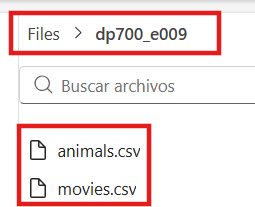

## **SET PARAMETERS**
If the toggle parameter option is selected, it is possible to introduce parameters from outside the notebook.

In [ ]:
dataset = "movies"

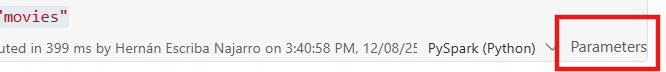

## **READING DATA FROM A LAKEHOUSE**

In the first running, the parameter dataset is set in "movies" string, however, in the future will be possible overwrite that parameter.

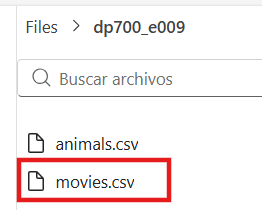

In [ ]:
df = spark.read.format("csv").option("header", "true").load(f"Files/dp700_e009/{dataset}.csv")

## **DISPLAY DATA**

In [ ]:
display(df)

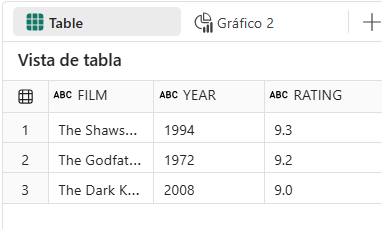

## **USING SPARK SQL**

In [ ]:
df.createOrReplaceTempView("df_view") #create a temporal df while the session is on

In [ ]:
%%sql
SELECT *
,now() AS ts -- define a timestamp
FROM df_view

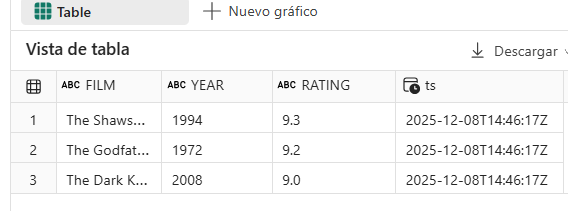

In [ ]:
df_ts = spark.sql(
    '''
    SELECT *, now() AS ts
    FROM df_view
    '''
)
display(df_ts)

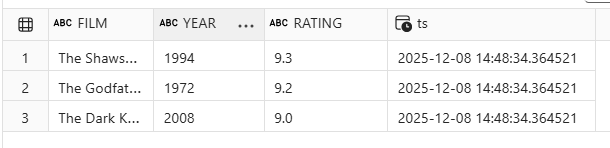

## **WRITING DATA TO A TABLE IN LAKEHOUSE**

In [ ]:
spark.sql(''' CREATE SCHEMA IF NOT EXISTS dp700_e009  ''')
df_ts.write.mode("overwrite").format("delta").saveAsTable(f"dp700_e009.{dataset}")

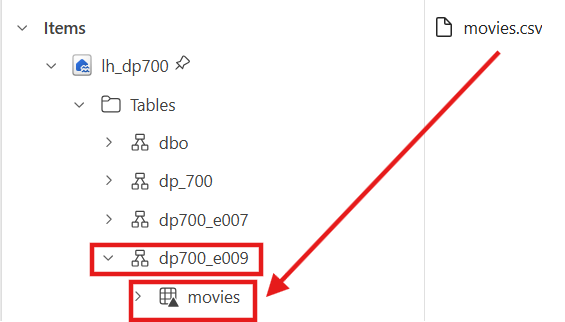

## **READING DATA FROM A DELTA TABLE LAKEHOUSE**

In [ ]:
df_table = spark.sql( f"SELECT * FROM lh_dp700.dp700_e009.{dataset}")
display(df_table)

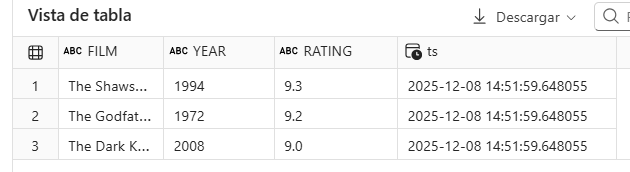

## **USING NOTEBOOKUTILS TO SET AN EXIT VALUE FOR THE NOTEBOOK**

In [ ]:
notebookutils.notebook.exit(f"Dataset {dataset} was processed ok")

image.png

## **RUN THE NOTEBOOK FROM A DATA PIPELINE**

We call the notebook from a Pipeline a set the new parameter with parameter "animals" to load and write the other csv loaded before.

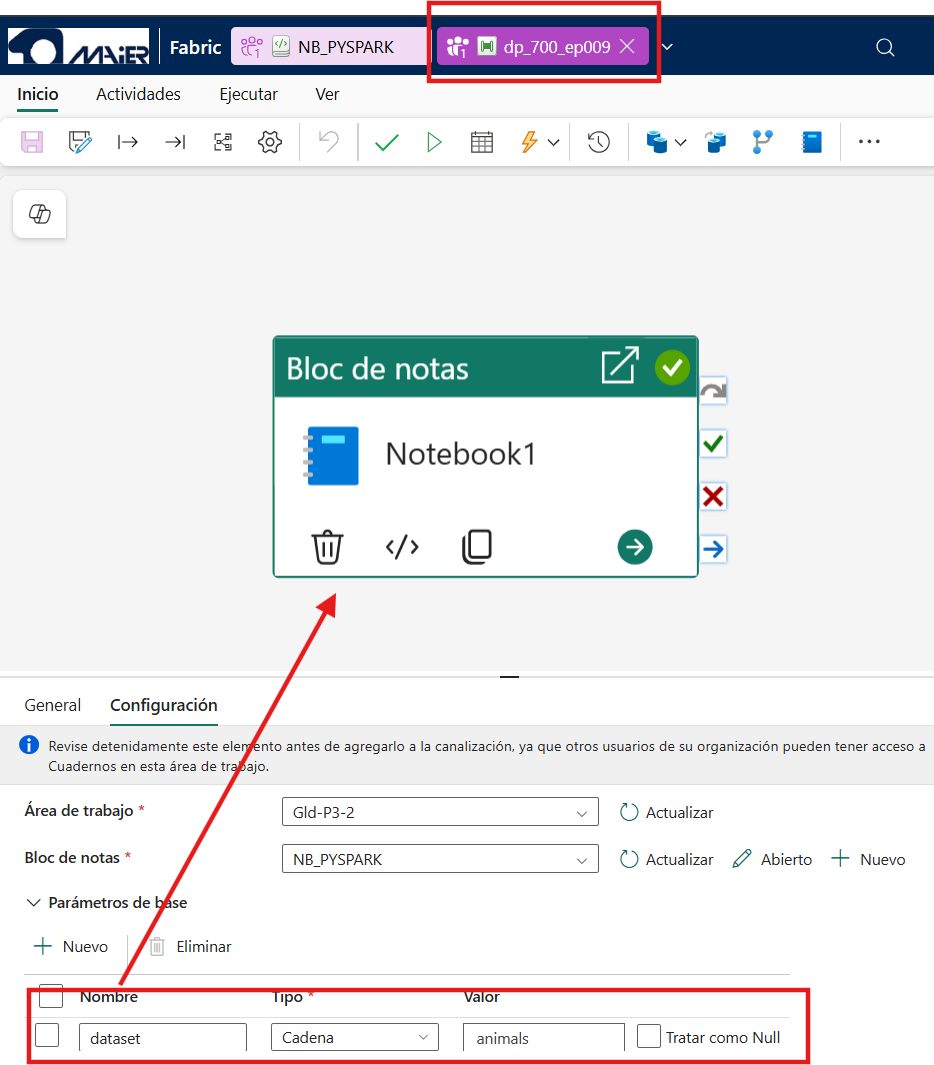

After run we can check that the new parameter is  "animals"

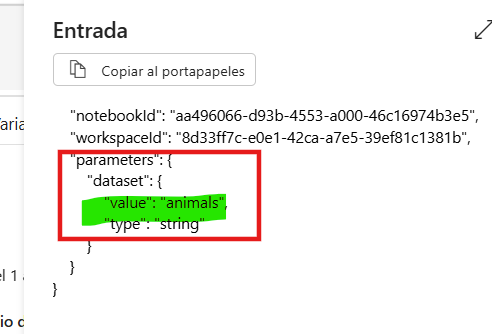

Also is possible to check open the notebook snapshot:

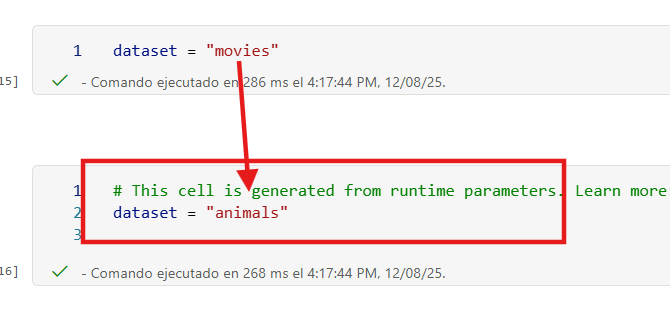

Also remember that an exit value was setted, after each ruuning is posible find in the output section and can be used in next pipeline step:

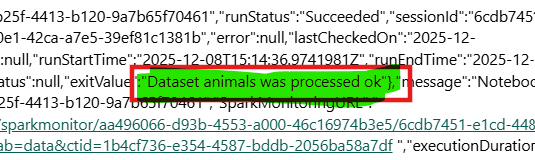



Finally, as the last check, a new table called animal is supposed to be created in the lakehouse:

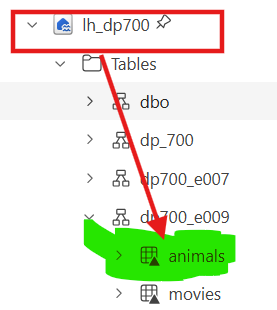
